<h4>Importing Libraries</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

<h4>Data Collection and Processing</h4>

In [2]:
gold_data = pd.read_csv("gld_price_data.csv")

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<h4>Getting the Statistical Measures of the Data</h4>

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<h4>Correlation</h4>

In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

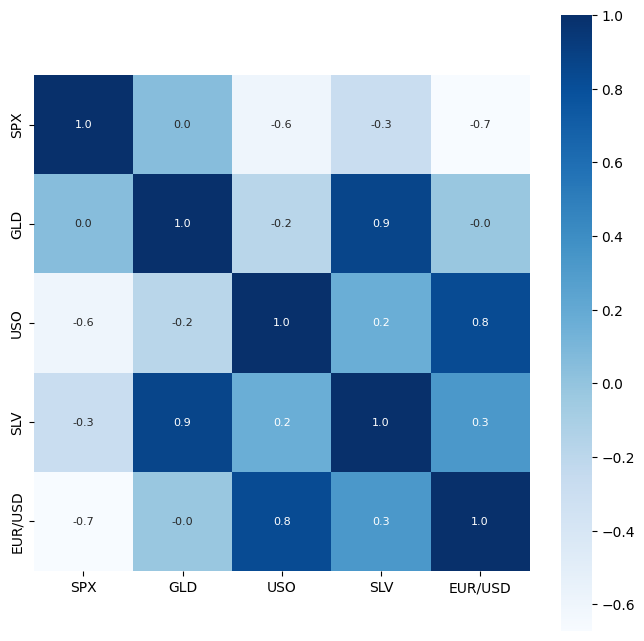

In [10]:
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')

In [11]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\Users\DELL\Desktop\ds\ML Projects\venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='GLD', ylabel='Density'>

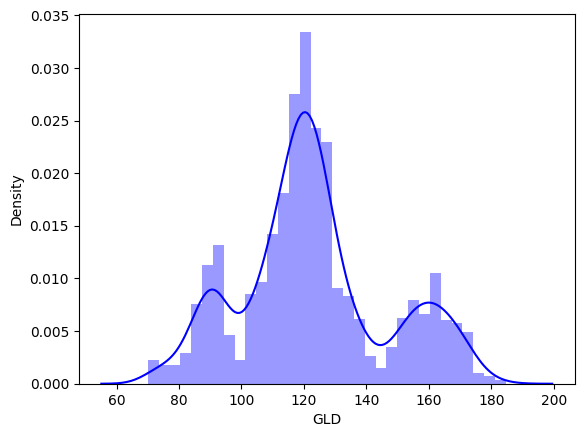

In [12]:
sns.distplot(gold_data['GLD'], color = 'blue')

<h4>Splitting the Features and the Target</h4>
<h6><i>In this GLD is the out put and SPX, SLV, EUR are the features</i></h6>

In [13]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [14]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


<h4>Splitting into Train and Test Data</h4>

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

<h4>Model Training</h4>


In [16]:
regressor = RandomForestRegressor(n_estimators = 100)

In [17]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

<h4>Model Estimation</h4>


In [18]:
test_data_predict = regressor.predict(X_test)
print(test_data_predict)

[168.67879946  81.92509984 116.01310014 127.77570072 120.52020154
 154.81969743 150.49029898 126.2271     117.50769891 126.03820068
 116.83340113 171.75890078 142.19119787 167.77339815 115.17100006
 117.83940042 139.47660231 170.26500113 159.18220357 159.54109932
 154.9669001  125.39340052 175.74409953 156.99120394 125.07830062
  93.92759978  77.41870011 120.60369978 119.08299909 167.56440026
  88.14630011 125.42049988  91.25500053 117.7724002  121.20139904
 135.98530038 115.30180107 115.22250085 147.0812999  107.12000087
 104.08990227  87.18339781 126.58820032 118.11739973 151.23309858
 119.5439001  108.7757998  108.08659833  93.28640059 127.09919781
  74.50550035 113.59569898 121.26270046 111.26919916 118.85689892
 120.35149978 159.88879955 168.72860124 146.7831967   85.78249854
  94.35160012  86.81819854  90.69979982 119.01960054 126.41260079
 127.70850016 170.43919919 122.16319915 117.29999898  98.44560017
 167.91390114 143.06349817 131.52350282 121.17590237 120.57339984
 119.61660

<h4>Compare the actual and predicted values</h4>


In [19]:
error_score = metrics.r2_score(test_data_predict, Y_test)
print("R Squared Error is : ", error_score)

R Squared Error is :  0.9895629240898626


In [20]:
Y_test = list(Y_test)

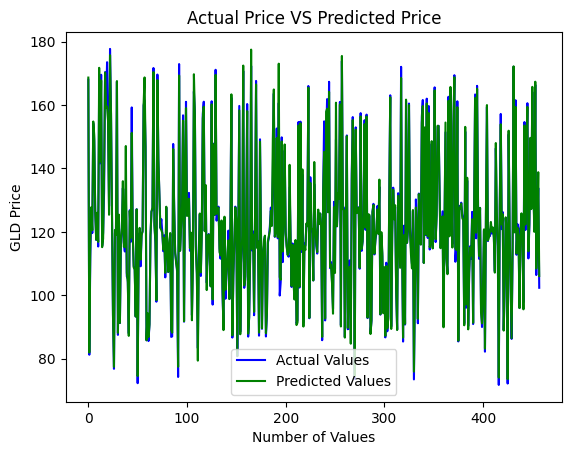

In [21]:
plt.plot(Y_test, color= 'blue', label = "Actual Values")
plt.plot(test_data_predict, color ='green', label= "Predicted Values")
plt.title("Actual Price VS Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

<h4>Pickling the Model File for Deployment</h4>

In [22]:
import pickle
pickle.dump(RandomForestRegressor, open('regressor.pkl','wb'))

In [23]:
pickeled_model = pickle.load(open('regressor.pkl', 'rb'))